<a href="https://colab.research.google.com/github/taxuyou/library-recommend-and-timeseries-predict/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C_%EB%A6%BF%EC%A7%80%2C_%EB%9D%BC%EC%8F%98%2C_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%2C_%EA%B7%B8%EB%9D%BC%EB%94%94%EC%96%B8%ED%8A%B8_%EB%B6%80%EC%8A%A4%ED%8C%85_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 및 전처리

In [0]:
#머신러닝 사이킷런 랜덤포레스트

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("대출과날씨데이터1.csv", parse_dates=["date"])
train.shape

(10942, 5)

In [0]:
train['date']=train['date'].astype(str)

In [4]:
import datetime
def getDayName(a,b,c):
   
  return ['MON','TUE','WED','THU','FRI','SAT','SUN'][datetime.date(int(a),int(b),int(c)).weekday()]

# 리스트로 저장 -> DataFrame으로 변환순으로 가면되여
# 빈리스트 선언
list1 = []
for i in train['date']:
    a = i[0:4]
    b = i[5:7]
    c = i[8:10]
    # print(getDayName(a,b,c))
    # 리스트에 추가
    list1.append(getDayName(a,b,c))

# 리스트 -> DataFrame으로 전환    
train['days'] = list1
train.head()

,date,c,mm,h,loan,days
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,SUN
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,SUN
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,SUN
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,SUN
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,SUN


In [5]:
## date 칼럼으로 요일 칼럼 holiday 만들어줌
list2 = []
for i in train['days']:
  if i == 'SUN':
    list2.append(1)
  elif i == 'SAT':
    list2.append(1)
  else:
    list2.append(0)
train["holiday"] = list2
train.head()

,date,c,mm,h,loan,days,holiday
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,SUN,1
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,SUN,1
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,SUN,1
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,SUN,1
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,SUN,1


In [6]:
## 일하는 날 칼럼 만들어줌
list3 = []
for i in train['holiday']:
  if i == 0:
    list3.append(1)
  else:
    list3.append(0)

train['workingday'] = list3
train.head()

,date,c,mm,h,loan,days,holiday,workingday
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,SUN,1,0
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,SUN,1,0
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,SUN,1,0
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,SUN,1,0
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,SUN,1,0


In [0]:
train['date']=train['date'].astype(str)

In [8]:
###   계절 컬럼 만들어줌
list4 = []

for i in train['date']:
  b = i[5:7]
  if b == '01' :
    list4.append(1)
  elif b == '02' :
    list4.append(1)
  elif b == '03' :
    list4.append(1)
  elif b == '04' :
    list4.append(2)
  elif b == '05' :
    list4.append(2)            
  elif b == '06' :
    list4.append(2)
  elif b == '07' :
    list4.append(3)
  elif b == '08' :
    list4.append(3)
  elif b == '09' :
    list4.append(3)
  elif b == '10' :
    list4.append(4)
  elif b == '11' :
    list4.append(4)  
  elif b == '12' :
    list4.append(4)
    
train['season'] = list4
train.head()

,date,c,mm,h,loan,days,holiday,workingday,season
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,SUN,1,0,1
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,SUN,1,0,1
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,SUN,1,0,1
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,SUN,1,0,1
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,SUN,1,0,1


In [9]:
###   데이터 속성 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 9 columns):
date          10942 non-null object
c             10942 non-null float64
mm            10942 non-null float64
h             10942 non-null float64
loan          10942 non-null int64
days          10942 non-null object
holiday       10942 non-null int64
workingday    10942 non-null int64
season        10942 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 769.4+ KB


In [0]:
# date 다시 데이트타임으로 변환
train['date'] = pd.to_datetime(train['date'], errors='coerce')

In [11]:
### 년, 월, 일, 시, 분, 초 칼럼 따로 만들어줌
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["dayofweek"] = train["date"].dt.dayofweek
train["hour"] = train["date"].dt.hour

train.shape

(10942, 13)

# 테스트 사이즈 30% 사용

In [12]:
test = train[int(len(train) * 0.3):]

test.shape

(7660, 13)

In [13]:
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day"] = train["date"].dt.day
train["hour"] = train["date"].dt.hour
train["minute"] = train["date"].dt.minute
train["second"] = train["date"].dt.second
train["dayofweek"] = train["date"].dt.dayofweek
train.shape

(10942, 16)

In [14]:
test["year"] = test["date"].dt.year
test["month"] = test["date"].dt.month
test["day"] = test["date"].dt.day
test["hour"] = test["date"].dt.hour
test["minute"] = test["date"].dt.minute
test["second"] = test["date"].dt.second
test["dayofweek"] = test["date"].dt.dayofweek
test.shape

(7660, 16)

# Feature Selection

*   신호와 잡음을 구분해야 한다.
*   피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
*   피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.



In [0]:
# 연속형 feature와 범주형 feature 
# 연속형 feature = ["c","mm","h"]
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [16]:
feature_names = ["season", "c", "h", "year", "hour",
                 "dayofweek", "holiday", "workingday"]

feature_names

['season', 'c', 'h', 'year', 'hour', 'dayofweek', 'holiday', 'workingday']

In [17]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10942, 8)


,season,c,h,year,hour,dayofweek,holiday,workingday
0,1,-1.1,97.9,2017,9,6,1,0
1,1,-0.5,97.7,2017,10,6,1,0
2,1,0.6,97.9,2017,11,6,1,0
3,1,2.2,96.3,2017,12,6,1,0
4,1,5.5,73.2,2017,13,6,1,0


In [18]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(7660, 8)


,season,c,h,year,hour,dayofweek,holiday,workingday
3282,4,13.5,82.5,2017,12,3,0,1
3283,4,13.2,88.8,2017,13,3,0,1
3284,4,13.3,91.7,2017,14,3,0,1
3285,4,13.3,87.0,2017,15,3,0,1
3286,4,13.3,88.8,2017,16,3,0,1


In [19]:
label_name = "loan"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10942,)


0     55
1     78
2    171
3    203
4    398
Name: loan, dtype: int64

# Score
# RMSLE

과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root) 으로 값이 작을 수록 정밀도가 높다.

0에 가까운 값이 나올 수록 정밀도가 높은 값이다.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)

![대체 텍스트](https://render.githubusercontent.com/render/math?math=%5Csqrt%7B%5Cfrac%7B1%7D%7Bn%7D%20%5Csum_%7Bi%3D1%7D%5En%20%28%5Clog%28p_i%20%2B%201%29%20-%20%5Clog%28a_i%2B1%29%29%5E2%20%7D&mode=display)



*   ${n}$ is the number of hours in the test set
*$p_i$ is your predicted count
*$a_i$ is the actual count
*$\log(x)$ is the natural logarithm

*좀 더 자세한 설명은 : RMSLE cost function

*잔차(residual)에 대한 평균에 로그를 씌운 값이다. => 과대평가 된 항목보다 과소 평가 된 항목에 패널티를 주기위해

*정답에 대한 오류를 숫자로 나타낸 값으로 값이 클 수록 오차가 크다는 의미다.
값이 작을 수록 오류가 적다는 의미를 나타낸다.

![대체 텍스트](https://camo.githubusercontent.com/215b635af41ad39e41f0396e1a0578042647e0f3/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f372f37332f4c6f6761726974686d732e7376672f34353670782d4c6f6761726974686d732e7376672e706e67)



In [20]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

# 선형회귀 모델 Linear Regression Model


*  선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘
* 선형회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
* 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다. 
* 아래 위키피디아에서 가져 온 그래프에서 파란선이 선형회귀 모델을 나타내고 빨간점들이 훈련데이터를 나타낸다.

![대체 텍스트](https://camo.githubusercontent.com/5fad4f2b1ab5ddac6476f6c2334a0cd044d30bcf/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f622f62652f4e6f726d646973745f72656772657373696f6e2e706e67)




In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [22]:
# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train_log),np.exp(preds)))

RMSLE Value For Linear Regression:  1.3662537448538297


# 릿지 Regularization Model - Ridge


*   회귀를 위한 선형모델
*   가중치(w)의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향을 최소화(기울기를 작게 만듦)
*   Regularization(정규화)는 오버피팅(과대적합)이 되지 않도록 모델을 강제로 제한한다는 의미
*   max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.




{'alpha': 1000, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  1.3663795245188097


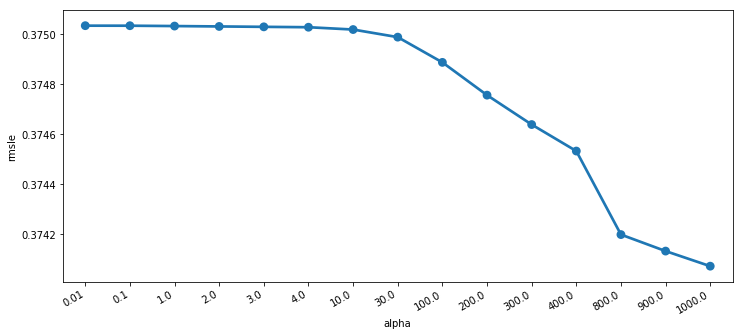

In [26]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit( X_train, y_train_log )
preds = grid_ridge_m.predict(X_train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log),np.exp(preds)))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)

df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

# 라쏘 Regularization Model - Lasso


*  선형회귀의 Regularization(규제)를 적용하는 대안
*  계수를 0에 가깝게 만들려고 하며 이를 L1규제라고 하며, 어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 피처가 생긴다는 의미다.
*  피처 선택이 자동으로 이루어진다고도 볼 수 있다.
*  alpha 값의 기본 값은 1.0이며, 과소 적합을 줄이기 위해서는 이 값을 줄여야 한다.
*  그리드 서치로 아래 라쏘모델을 실행했을 때 베스트 알파값은 0.0025
*  max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.



{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  1.3697802843424562


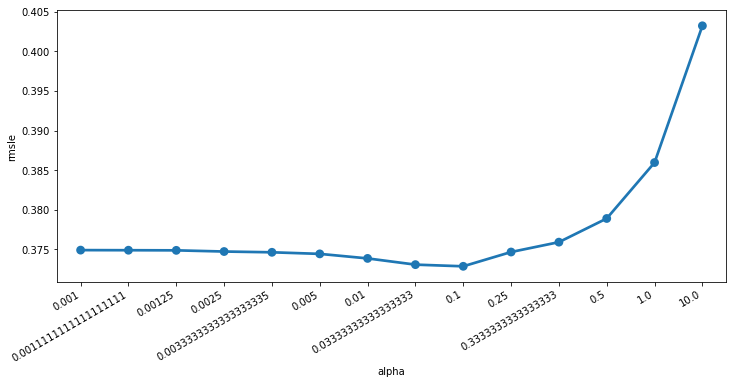

In [31]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit( X_train , y_train_log )
preds = grid_lasso_m.predict(X_train)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train_log),np.exp(preds)))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

# 앙상블모델 - 랜덤포레스트

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds))
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.20917479095173683


# 앙상블모델 - 그라디언트 부스트
# Ensemble Model - Gradient Boost



*  여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
*  회귀와 분류에 모두 사용할 수 있음
*  랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
*  무작위성이 없고 강력한 사전 가지치기가 사용 됨
*  1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠름
*  learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
*  n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가 되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로잡을 기회가 많아지지만 너무 크면 모델이 복잡해지고 오버피팅(과대적합)이 될 수 있다.
*  max_depth(max_leaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds))
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.3655131746449926


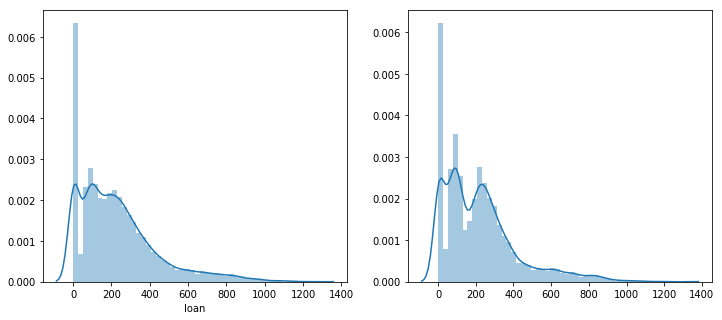

In [35]:
predsTest = gbm.predict(X_test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)